## Installations & Imports

In [1]:
# Here we import everything we need for the project
import os
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

print(tf.__version__)

2.13.0-rc0


## Initializations

In [2]:
input_directory = 'face_recognition/input_directory'
model_directory = 'face_recognition/model_directory'
test_directory = 'face_recognition/test_directory'


## Utility Functions

In [7]:
# This function is used more for debugging and showing results later. It plots the image into the notebook
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)

  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")

  plt.title("Image: " + repr(path.split("/")[-2]))

## Extracting images from files

In [8]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(input_directory, topdown=False):
  # print(f"root: {root}  dirs: {dirs}   files: {files}")
  # print("-"*10)
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("jpg") or path.endswith("png") or path.endswith("JPG") or path.endswith("PNG"): # We want only the images
      imagepaths.append(path)

class_list = dirs
print("Unique face list: ",class_list)
print("Total images: ",len(imagepaths)) # If > 0, then a PNG and JPG image was loaded

Unique face list:  ['alvi', 'asif', 'alal', 'sohrab']
Total images:  200


## Path of the First 10 Images

In [9]:
for i in range(10):
  if(len(imagepaths) > i):
    print(imagepaths[i])

face_recognition/input_directory/alvi/IMG_2818.JPG
face_recognition/input_directory/alvi/IMG_2824.JPG
face_recognition/input_directory/alvi/IMG_2830.JPG
face_recognition/input_directory/alvi/IMG_2831.JPG
face_recognition/input_directory/alvi/IMG_2825.JPG
face_recognition/input_directory/alvi/IMG_2819.JPG
face_recognition/input_directory/alvi/IMG_2833.JPG
face_recognition/input_directory/alvi/IMG_2827.JPG
face_recognition/input_directory/alvi/IMG_2826.JPG
face_recognition/input_directory/alvi/IMG_2832.JPG


## Ploting Images

In [10]:
# This function is used more for debugging and showing results later. It plots the image into the notebook
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)

  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")

  plt.title("Image: " + path.split("/")[-2])

Image of:  asif


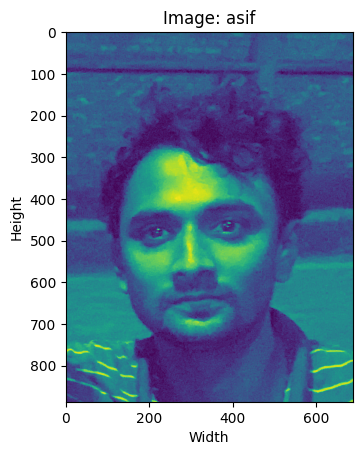

In [11]:
random_img_path = imagepaths[random.randrange(0,len(imagepaths))]
print("Image of: ",random_img_path.split("/")[-2])
plot_image(random_img_path) #We plot the first image from our imagepaths array

## Image Labeling

In [12]:
image_list = [] # Image data
label_list = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  image_list.append(img)

  # Processing label in image path
  category = path.split("/")[-2]
  label = int(class_list.index(category)) # We need to convert 10_down to 00_down, or else it crashes
  label_list.append(label)

# Turn X and y into np.array to speed up train_test_split
image_list = np.array(image_list, dtype="uint8")
image_list = image_list.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
label_list = np.array(label_list)

print("Images loaded: ", len(image_list))
print("Labels loaded: ", len(label_list))

print("Unique face list: ",class_list)
# print("5 random images with coresponding Label: ")
# for i in range(5):
#   r = random.randrange(0,len(label_list))
#   print(f"Label: {label_list[r]}      Path: {imagepaths[r]}")
print("All images with coresponding Label: ")
for i in range(len(label_list)):
  print(f"Label: {label_list[i]}      Path: {imagepaths[i]}")

Images loaded:  200
Labels loaded:  200
Unique face list:  ['alvi', 'asif', 'alal', 'sohrab']
All images with coresponding Label: 
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2818.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2824.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2830.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2831.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2825.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2819.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2833.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2827.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2826.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2832.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2836.JPG
Label: 0      Path: face_recognition/input_directory/alvi/IMG_2822.JPG
Label: 0      Pat

## Splitting the Dataset

In [13]:
#tr = 0.1 # Percentage of images that we want to use for training.
ts = 0.2 # Percentage of images that we want to use for testing.
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=ts, random_state=42)

In [14]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

160
40
160
40


## Construction of Model

In [29]:
def get_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(len(label_list), activation='softmax'))

  return model

## Compile the Model

In [30]:
# Configures the model for training

model = get_model()

model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

## Train the Model

In [31]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(x_train, y_train, epochs=15, batch_size=25, verbose=2, validation_data=(x_test, y_test))

Epoch 1/15
7/7 - 2s - loss: 27.6971 - accuracy: 0.2000 - val_loss: 2.2384 - val_accuracy: 0.5500 - 2s/epoch - 276ms/step
Epoch 2/15
7/7 - 2s - loss: 1.9020 - accuracy: 0.6313 - val_loss: 0.7499 - val_accuracy: 0.6750 - 2s/epoch - 240ms/step
Epoch 3/15
7/7 - 2s - loss: 0.3280 - accuracy: 0.8875 - val_loss: 0.7746 - val_accuracy: 0.7000 - 2s/epoch - 253ms/step
Epoch 4/15
7/7 - 2s - loss: 0.2733 - accuracy: 0.9062 - val_loss: 0.6553 - val_accuracy: 0.7750 - 2s/epoch - 240ms/step
Epoch 5/15
7/7 - 2s - loss: 0.1257 - accuracy: 0.9688 - val_loss: 0.4373 - val_accuracy: 0.9250 - 2s/epoch - 236ms/step
Epoch 6/15
7/7 - 2s - loss: 0.0338 - accuracy: 0.9937 - val_loss: 0.4599 - val_accuracy: 0.9000 - 2s/epoch - 247ms/step
Epoch 7/15
7/7 - 2s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.4995 - val_accuracy: 0.8500 - 2s/epoch - 244ms/step
Epoch 8/15
7/7 - 2s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3115 - val_accuracy: 0.9000 - 2s/epoch - 303ms/step
Epoch 9/15
7/7 - 2s - loss: 3.5082e-04 

## Save the model

In [32]:
# Save entire model to a HDF5 file
name = 'facerecognition_model.h5'

model_path = os.path.join(model_directory, name)

print(model_path)

face_recognition/model_directory/facerecognition_model.h5


In [33]:
model.save(model_path)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Testing Model

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

2/2 [==============================] - 0s 25ms/step - loss: 0.4037 - accuracy: 0.9000
Test accuracy: 90.00%


## Prediction Using Model

In [5]:
#import the model
name = 'facerecognition_model.h5'
model_path = os.path.join(model_directory, name)
model = keras.models.load_model(model_path, compile=False)

In [15]:
predictions = model.predict(x_test) # Make predictions towards the test set

2/2 [==============================] - 0s 26ms/step


In [16]:
cnt_true = 0
cnt_false = 0
for i in range(len(predictions)):

  # print(np.argmax(predictions[i]), y_test[i]) # If same, got it right

  if np.argmax(predictions[i]) == y_test[i]:
    cnt_true+=1

  else:
    cnt_false+=1

print('Number of Accurate predicted images: {0}'.format(cnt_true))

print('Number of Wrong predicted images: {0}'.format(cnt_false))

Number of Accurate predicted images: 36
Number of Wrong predicted images: 4


In [17]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array, class_names):

  plt.figure(figsize=(15,5))

  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction

    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(predicted_label,
                                  100*np.max(prediction),
                                  true_label),
                                  color=color)
  plt.show()

Class names with corresponding person name: 
{0: 'alvi', 1: 'asif', 2: 'alal', 3: 'sohrab'}


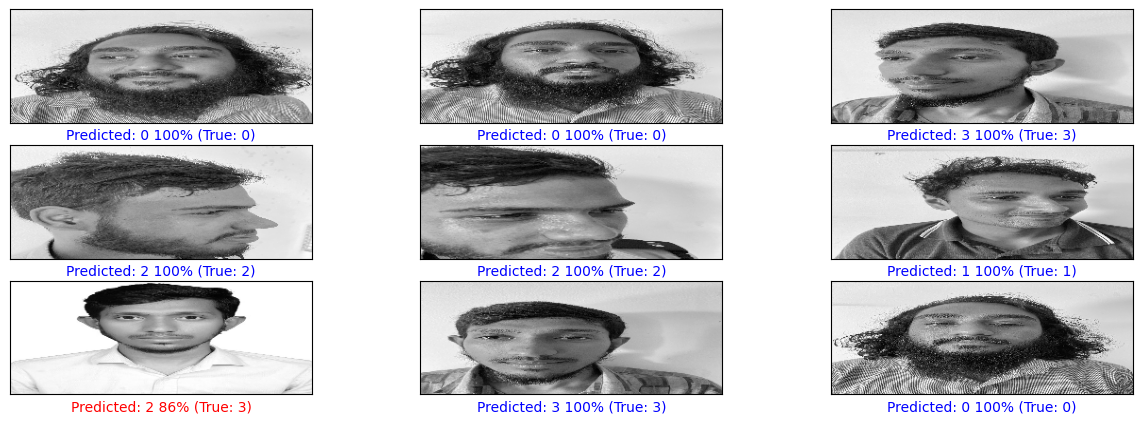

In [18]:
class_dict = {}
for i in range(len(class_list)):
  class_dict[i] = class_list[i]

print("Class names with corresponding person name: ")
print(class_dict)

validate_9_images(predictions, y_test, x_test, class_dict)

## Prediction for the user given images

In [19]:
# creating a list of image file names
image_input_list = sorted(os.listdir(test_directory))
print(image_input_list)

['alvi.jpg', 'asif.jpg', 'sohrab.JPEG', 'sohrab2.jpg']


In [20]:
X = [] # Image data

# Loops through imagepaths to load images and labels into arrays
for path in image_input_list:
  img = os.path.join(test_directory, path)
  print(img)
  img = cv2.imread(img) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)

# Turn X into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(image_input_list), 120, 320, 1) # Needed to reshape so CNN knows it's different images

print("Images loaded: ", len(X))

face_recognition/test_directory/alvi.jpg
face_recognition/test_directory/asif.jpg
face_recognition/test_directory/sohrab.JPEG
face_recognition/test_directory/sohrab2.jpg
Images loaded:  4


In [21]:
input_predictions = model.predict(X) # Make predictions towards the test set

1/1 [==============================] - 0s 30ms/step


In [22]:
#getting the predictions in a list as int
index_of_char = []
for i in range(len(input_predictions)):
  index_of_char.append(int(np.argmax(input_predictions[i])))

In [23]:
print(index_of_char)

[0, 1, 3, 3]


In [24]:
for i in index_of_char:
  print("The predicted face is: {0}".format(class_dict[i]))

The predicted face is: alvi
The predicted face is: asif
The predicted face is: sohrab
The predicted face is: sohrab
